**Data Processing**

Importing the Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [ ]:
# Import data
dataset = pd.read_csv('/content/Melbourne_housing_extra_data.csv')

In [ ]:
# Get number of rows and columns
dataset.shape

(19740, 21)

In [ ]:
# View data
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [ ]:
# View column names
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# Change column names
dataset.columns = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'PostCode', 'Bedroom2', 'Bathroom', 'Car',
       'LandSize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'RegionName', 'PropertyCount']
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,PostCode,...,Bathroom,Car,LandSize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
# Remove unnecessary columns and reorder so independent variable is last
dataset = dataset[['Suburb','Rooms', 'Type','Method','Distance', 'PostCode', 'Bedroom2', 'Bathroom', 'Car',
       'LandSize', 'BuildingArea', 'YearBuilt', 'RegionName', 'PropertyCount','Price']]

dataset.head()

,Suburb,Rooms,Type,Method,Distance,PostCode,Bedroom2,Bathroom,Car,LandSize,BuildingArea,YearBuilt,RegionName,PropertyCount,Price
0,Abbotsford,2,h,SS,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Northern Metropolitan,4019.0,NaN
1,Abbotsford,2,h,S,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,4019.0,1480000.0
2,Abbotsford,2,h,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,1035000.0
3,Abbotsford,3,u,VB,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Northern Metropolitan,4019.0,NaN
4,Abbotsford,3,h,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,1465000.0


Missing Values

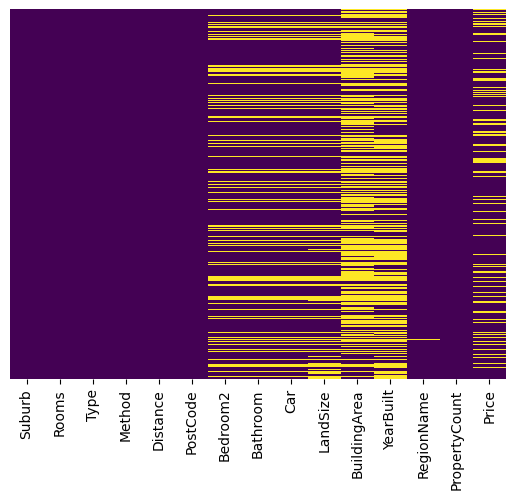

In [ ]:
# Visualize missing values
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [ ]:
# Count of missing values
dataset.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
Distance             8
PostCode             8
Bedroom2          4413
Bathroom          4413
Car               4413
LandSize          4796
BuildingArea     11123
YearBuilt        10389
RegionName           8
PropertyCount        8
Price             4344
dtype: int64

In [ ]:
# Percentage of values missing
dataset.isnull().sum()/len(dataset)*100


Suburb            0.000000
Rooms             0.000000
Type              0.000000
Method            0.000000
Distance          0.040527
PostCode          0.040527
Bedroom2         22.355623
Bathroom         22.355623
Car              22.355623
LandSize         24.295846
BuildingArea     56.347518
YearBuilt        52.629179
RegionName        0.040527
PropertyCount     0.040527
Price            22.006079
dtype: float64

In [ ]:
# Remove missing rows
# to remove missing rows from a specific column: dataset = dataset[pd.notnull(dataset['Price'])]
dataset = dataset.dropna() # set axis to 1 to drop entire columns that have a missing value

Data types

In [ ]:
# View data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 2 to 19739
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6056 non-null   object 
 1   Rooms          6056 non-null   int64  
 2   Type           6056 non-null   object 
 3   Method         6056 non-null   object 
 4   Distance       6056 non-null   float64
 5   PostCode       6056 non-null   float64
 6   Bedroom2       6056 non-null   float64
 7   Bathroom       6056 non-null   float64
 8   Car            6056 non-null   float64
 9   LandSize       6056 non-null   float64
 10  BuildingArea   6056 non-null   float64
 11  YearBuilt      6056 non-null   float64
 12  RegionName     6056 non-null   object 
 13  PropertyCount  6056 non-null   float64
 14  Price          6056 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 757.0+ KB


In [ ]:
# Identify object columns
dataset.select_dtypes(['object']).columns

Index(['Suburb', 'Type', 'Method', 'RegionName'], dtype='object')

In [ ]:
# Convert non-null objects to category
o2c = dataset.select_dtypes(['object']).columns

for o in o2c:
    dataset[o] = dataset[o].astype('category')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 2 to 19739
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         6056 non-null   category
 1   Rooms          6056 non-null   int64   
 2   Type           6056 non-null   category
 3   Method         6056 non-null   category
 4   Distance       6056 non-null   float64 
 5   PostCode       6056 non-null   float64 
 6   Bedroom2       6056 non-null   float64 
 7   Bathroom       6056 non-null   float64 
 8   Car            6056 non-null   float64 
 9   LandSize       6056 non-null   float64 
 10  BuildingArea   6056 non-null   float64 
 11  YearBuilt      6056 non-null   float64 
 12  RegionName     6056 non-null   category
 13  PropertyCount  6056 non-null   float64 
 14  Price          6056 non-null   float64 
dtypes: category(4), float64(10), int64(1)
memory usage: 608.3 KB


In [ ]:
# Statistical summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6056.0,2.925363e+00,0.970265,1.0,2.0,3.00,4.00,8.0
Distance,6056.0,9.661757e+00,5.508450,0.0,5.9,9.00,12.40,47.4
PostCode,6056.0,3.101799e+03,87.124266,3000.0,3044.0,3081.00,3146.00,3977.0
Bedroom2,6056.0,2.898943e+00,0.970085,0.0,2.0,3.00,3.00,9.0
Bathroom,6056.0,1.574637e+00,0.709295,1.0,1.0,1.00,2.00,8.0
Car,6056.0,1.571334e+00,0.936743,0.0,1.0,1.00,2.00,10.0
LandSize,6056.0,5.566380e+02,966.302894,0.0,158.0,401.00,661.00,37000.0
BuildingArea,6056.0,1.659836e+02,268.415257,0.0,91.0,126.75,180.00,16000.0
YearBuilt,6056.0,1.857325e+03,428.177304,1.0,1930.0,1965.00,1997.25,2018.0
PropertyCount,6056.0,7.439054e+03,4348.683611,389.0,4407.0,6567.00,9758.00,21650.0


In [ ]:
# Convert float to integer
f2i = ['Rooms','Bedroom2','Bathroom','Car']
for f in f2i:
       dataset[f] = dataset[f].astype('int')
dataset.describe().transpose()

# Convert appropriate columns to categorical
f2c = ['PostCode']
for ff in f2c:
    dataset[ff] = dataset[ff].astype('category')

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 2 to 19739
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         6056 non-null   category
 1   Rooms          6056 non-null   int64   
 2   Type           6056 non-null   category
 3   Method         6056 non-null   category
 4   Distance       6056 non-null   float64 
 5   PostCode       6056 non-null   category
 6   Bedroom2       6056 non-null   int64   
 7   Bathroom       6056 non-null   int64   
 8   Car            6056 non-null   int64   
 9   LandSize       6056 non-null   float64 
 10  BuildingArea   6056 non-null   float64 
 11  YearBuilt      6056 non-null   float64 
 12  RegionName     6056 non-null   category
 13  PropertyCount  6056 non-null   float64 
 14  Price          6056 non-null   float64 
dtypes: category(5), float64(6), int64(4)
memory usage: 578.3 KB


Exploratory Analysis

In [ ]:
# Feature engineering

# Convert price to millions
dataset['Price'] = dataset['Price']/1000000

# Home Age
dataset['HomeAge'] = 2017 - dataset['YearBuilt']

# Identify homes older than 50 years old as historic
dataset['Historic'] = np.where(dataset['HomeAge']>=50,1,0)

# Confirm changes
dataset.head()

,Suburb,Rooms,Type,Method,Distance,PostCode,Bedroom2,Bathroom,Car,LandSize,BuildingArea,YearBuilt,RegionName,PropertyCount,Price,HomeAge,Historic
2,Abbotsford,2,h,S,2.5,3067.0,2,1,0,156.0,79.0,1900.0,Northern Metropolitan,4019.0,1.035,117.0,1
4,Abbotsford,3,h,SP,2.5,3067.0,3,2,0,134.0,150.0,1900.0,Northern Metropolitan,4019.0,1.465,117.0,1
6,Abbotsford,4,h,VB,2.5,3067.0,3,1,2,120.0,142.0,2014.0,Northern Metropolitan,4019.0,1.600,3.0,0
11,Abbotsford,3,h,S,2.5,3067.0,4,2,0,245.0,210.0,1910.0,Northern Metropolitan,4019.0,1.876,107.0,1
14,Abbotsford,2,h,S,2.5,3067.0,2,1,2,256.0,107.0,1890.0,Northern Metropolitan,4019.0,1.636,127.0,1


UNIVARIATE

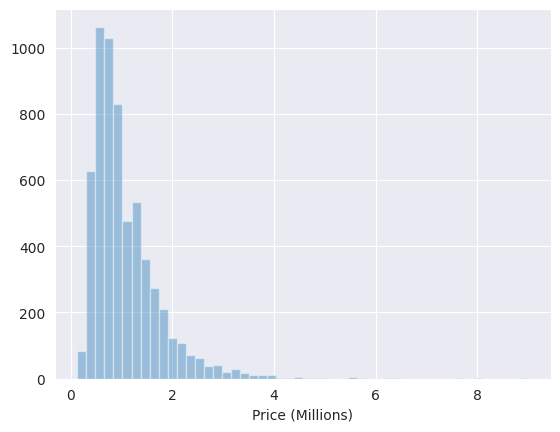

In [ ]:
sns.set_style('darkgrid')

# Create histogram
sns.distplot(dataset['Price'],kde = False)
plt.xlabel('Price (Millions)')
plt.show()

BI-VARIATE

In [ ]:
# Identify categorical variables
categorical = dataset.select_dtypes(['category']).columns
print(categorical)
len(categorical)

Index(['Suburb', 'Type', 'Method', 'PostCode', 'RegionName'], dtype='object')


5

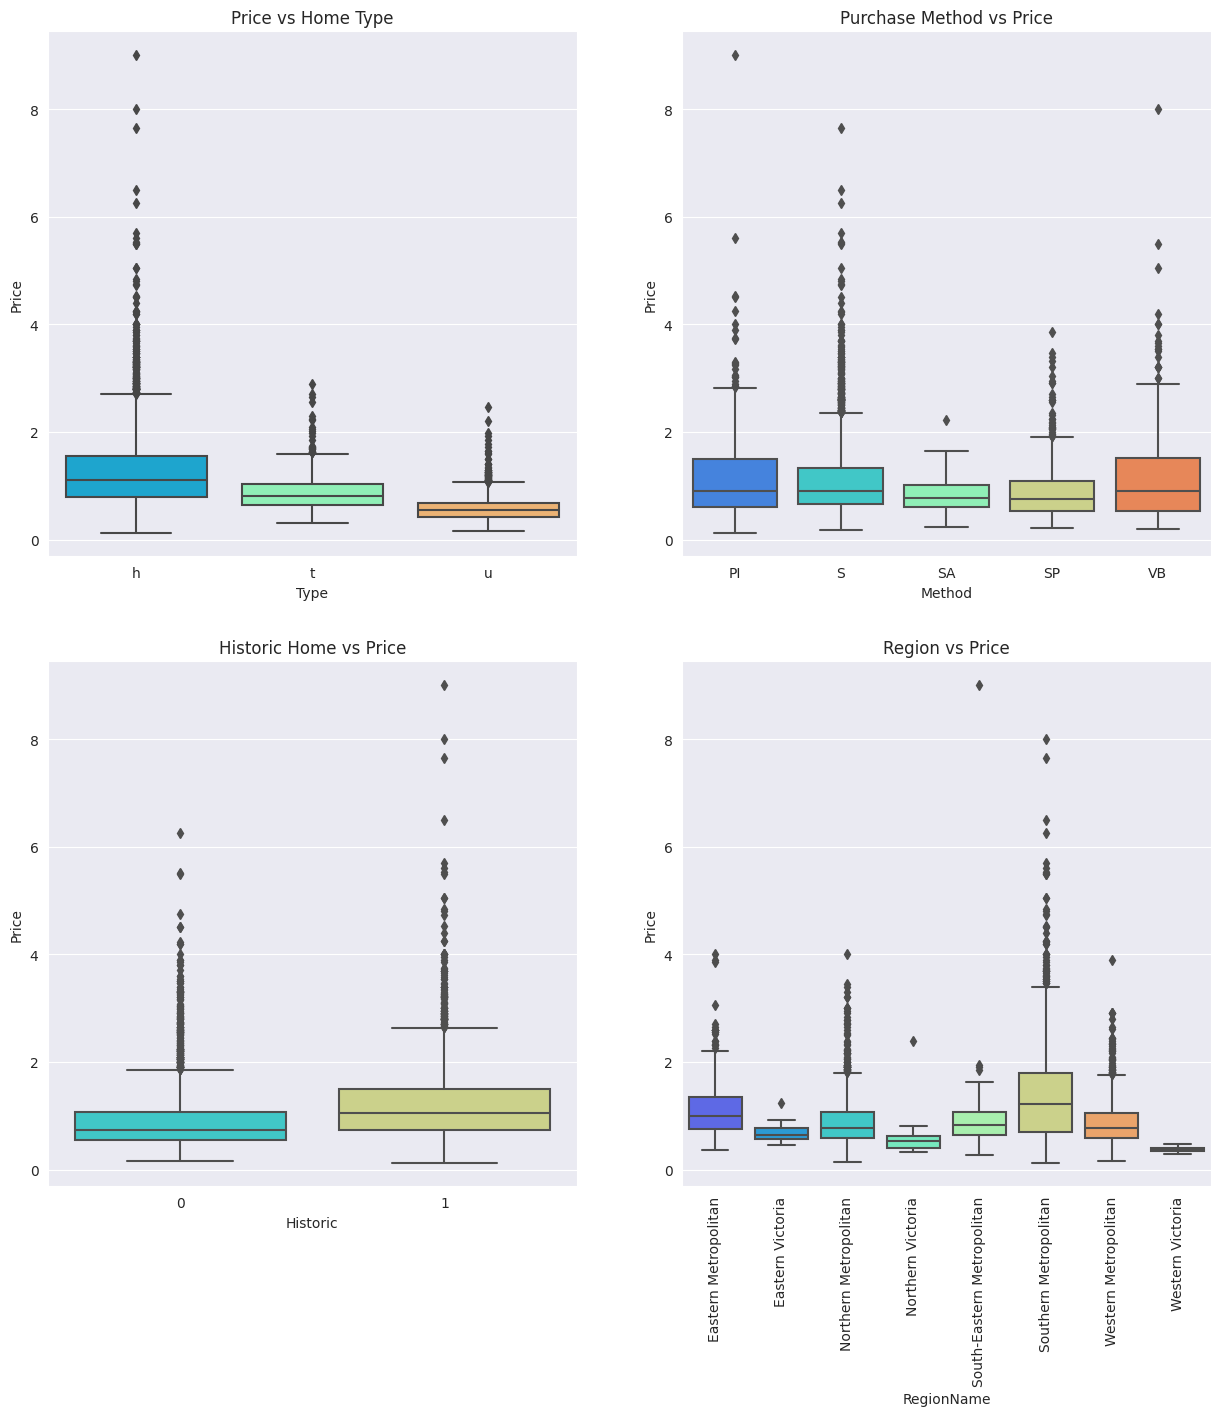

In [ ]:
# Create subplot
f, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot [0,0]
p1 = sns.boxplot(x=dataset['Type'], y=dataset['Price'], ax=axes[0, 0], palette='rainbow')
p1.set_title('Price vs Home Type')

# Plot [0,1]
p2 = sns.boxplot(x=dataset['Method'], y=dataset['Price'], ax=axes[0, 1], palette='rainbow')
p2.set_title('Purchase Method vs Price')

# Plot [1,0]
p3 = sns.boxplot(x=dataset['Historic'], y=dataset['Price'], ax=axes[1, 0], palette='rainbow')
p3.set_title('Historic Home vs Price')

# Plot [1,1]
p4 = sns.boxplot(x=dataset['RegionName'], y=dataset['Price'], ax=axes[1, 1], palette='rainbow')
p4.set_title('Region vs Price')

plt.xticks(rotation=90)
plt.show()


In [ ]:
# Stat summary
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,6056.0,2.925363,0.970265,1.000,2.000,3.000,4.00,8.0
Distance,6056.0,9.661757,5.508450,0.000,5.900,9.000,12.40,47.4
Bedroom2,6056.0,2.898943,0.970085,0.000,2.000,3.000,3.00,9.0
Bathroom,6056.0,1.574637,0.709295,1.000,1.000,1.000,2.00,8.0
Car,6056.0,1.571334,0.936743,0.000,1.000,1.000,2.00,10.0
LandSize,6056.0,556.638045,966.302894,0.000,158.000,401.000,661.00,37000.0
BuildingArea,6056.0,165.983603,268.415257,0.000,91.000,126.750,180.00,16000.0
YearBuilt,6056.0,1857.324569,428.177304,1.000,1930.000,1965.000,1997.25,2018.0
PropertyCount,6056.0,7439.053831,4348.683611,389.000,4407.000,6567.000,9758.00,21650.0
Price,6056.0,1.071224,0.674220,0.131,0.625,0.882,1.33,9.0


In [ ]:
# Identify continuous variables
print(dataset.select_dtypes(['float']).columns)

Index(['Distance', 'LandSize', 'BuildingArea', 'YearBuilt', 'PropertyCount',
       'Price', 'HomeAge'],
      dtype='object')


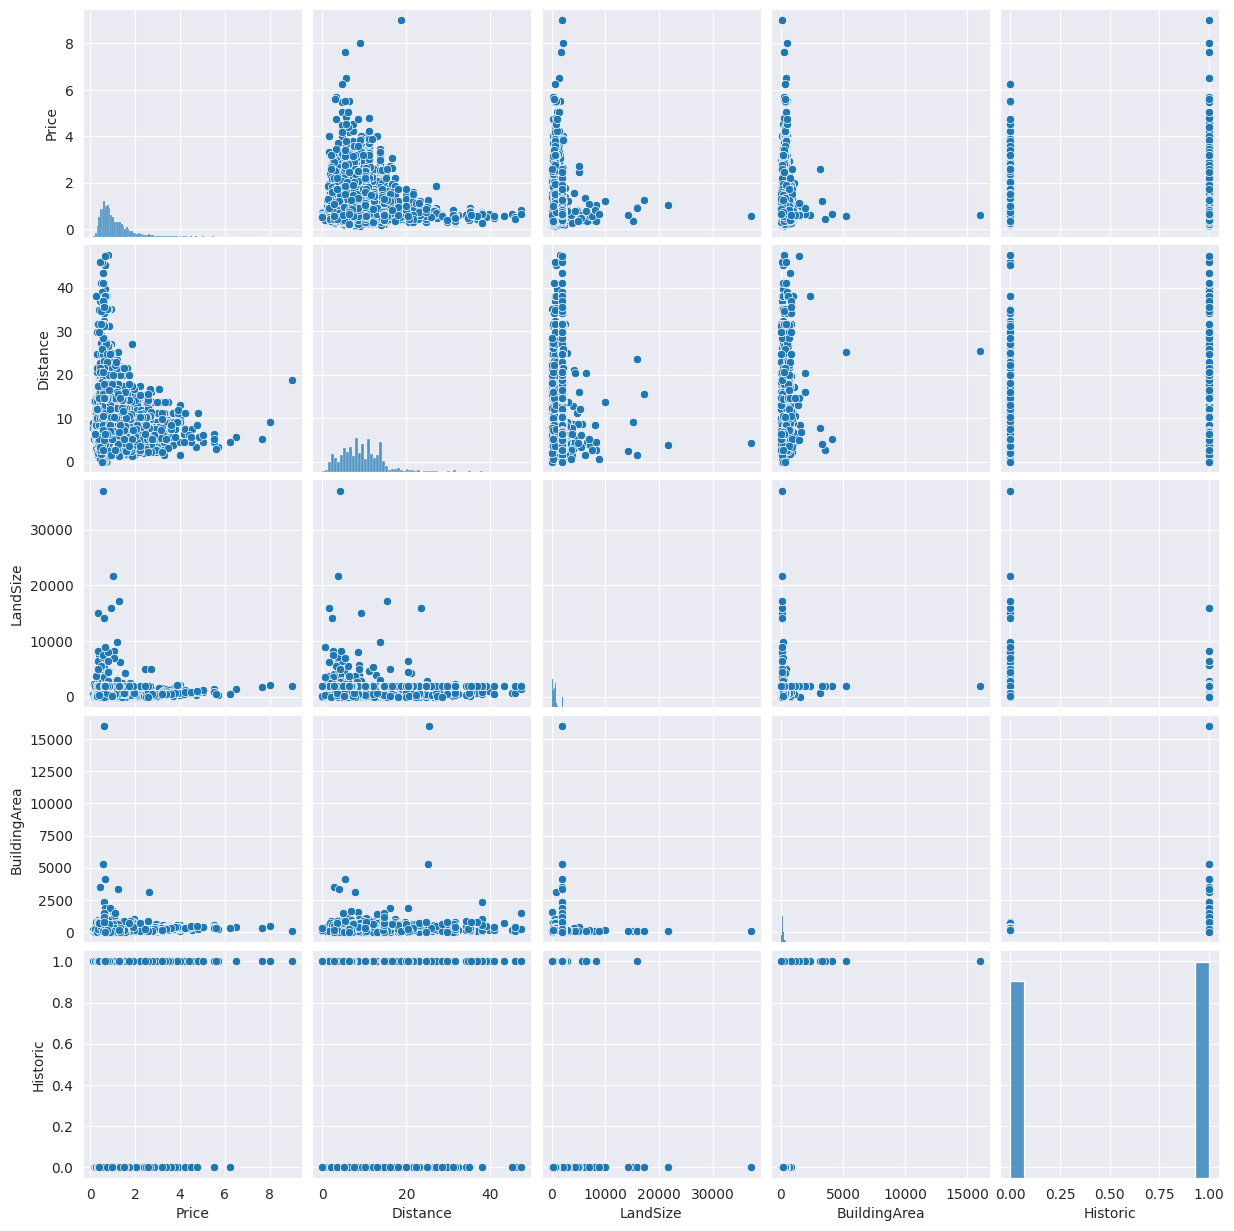

In [ ]:
# Plot
sns.pairplot(dataset,
             vars= ['Price','Distance', 'LandSize', 'BuildingArea','Historic'], palette = 'viridis')

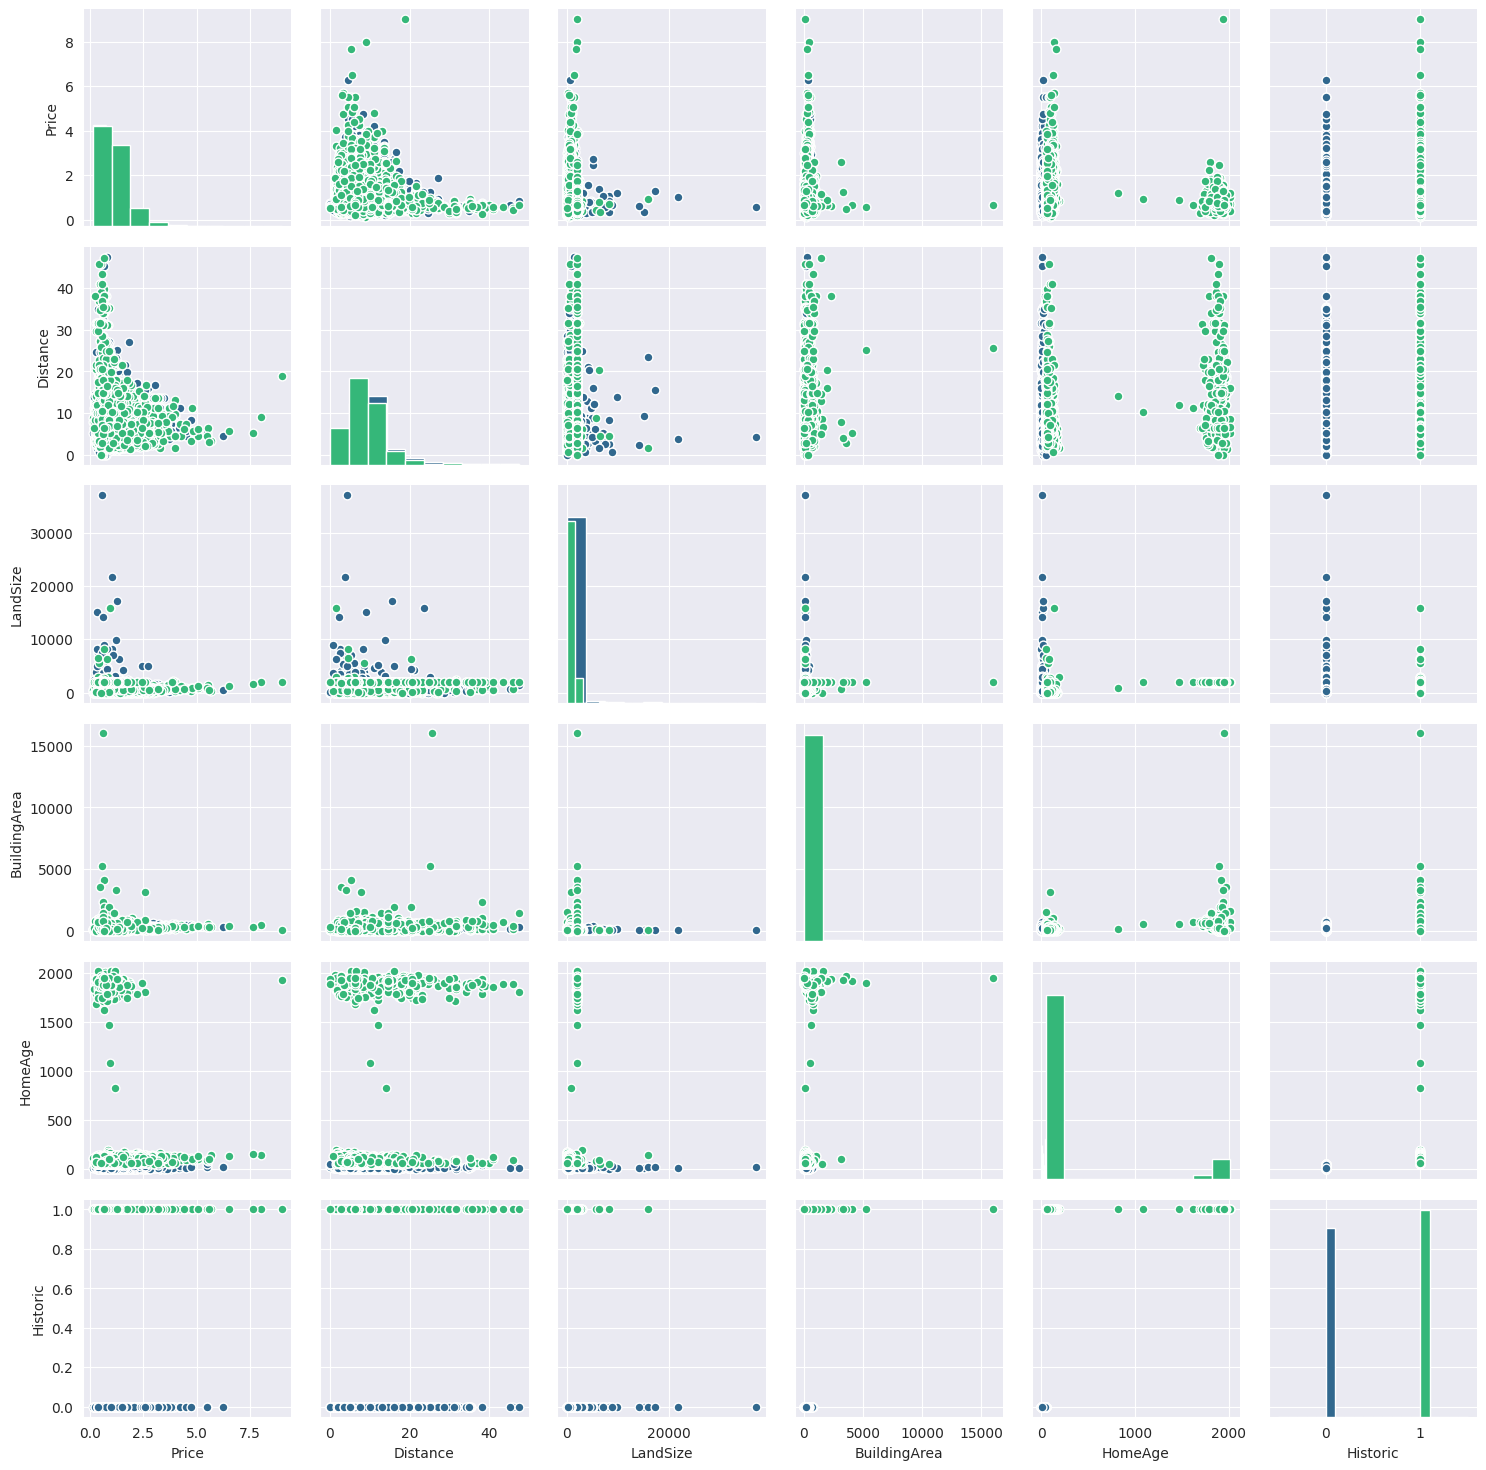

In [ ]:
# Plot
g =sns.PairGrid(dataset,
             vars= ['Price','Distance', 'LandSize', 'BuildingArea','HomeAge','Historic'],
             hue = 'Historic',
             palette = 'viridis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, edgecolor = 'w', s = 40)

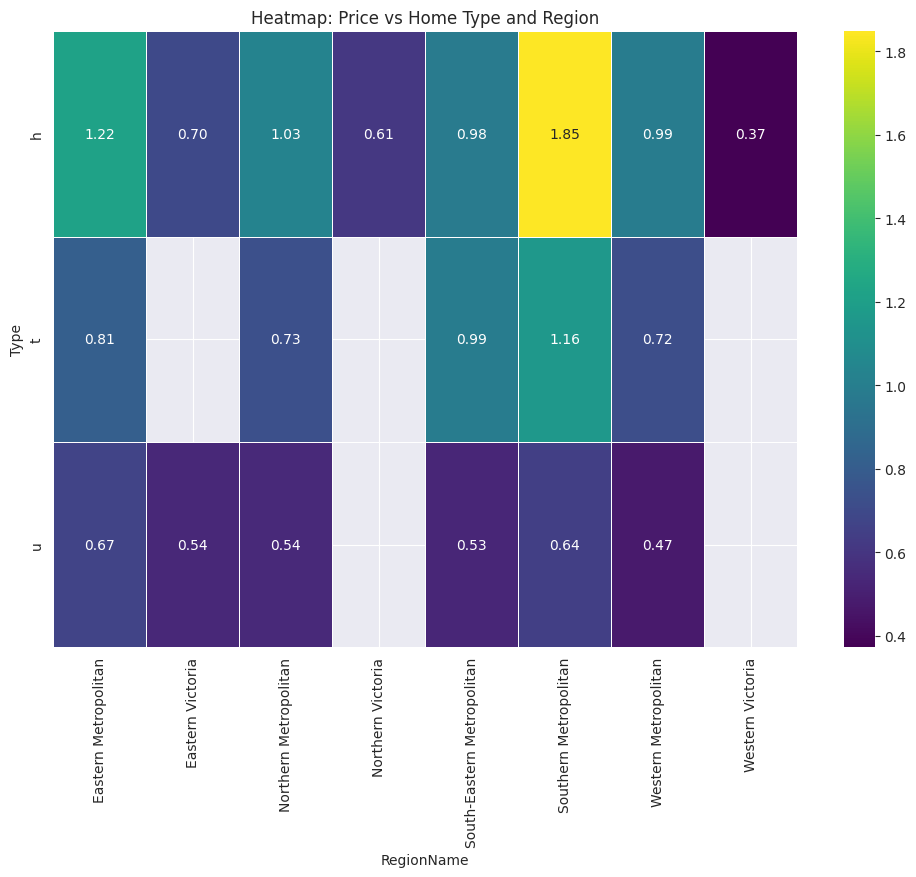

In [ ]:
#HEATMAP
heatmap_data = dataset.pivot_table(index='Type', columns='RegionName', values='Price')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap: Price vs Home Type and Region')
plt.show()

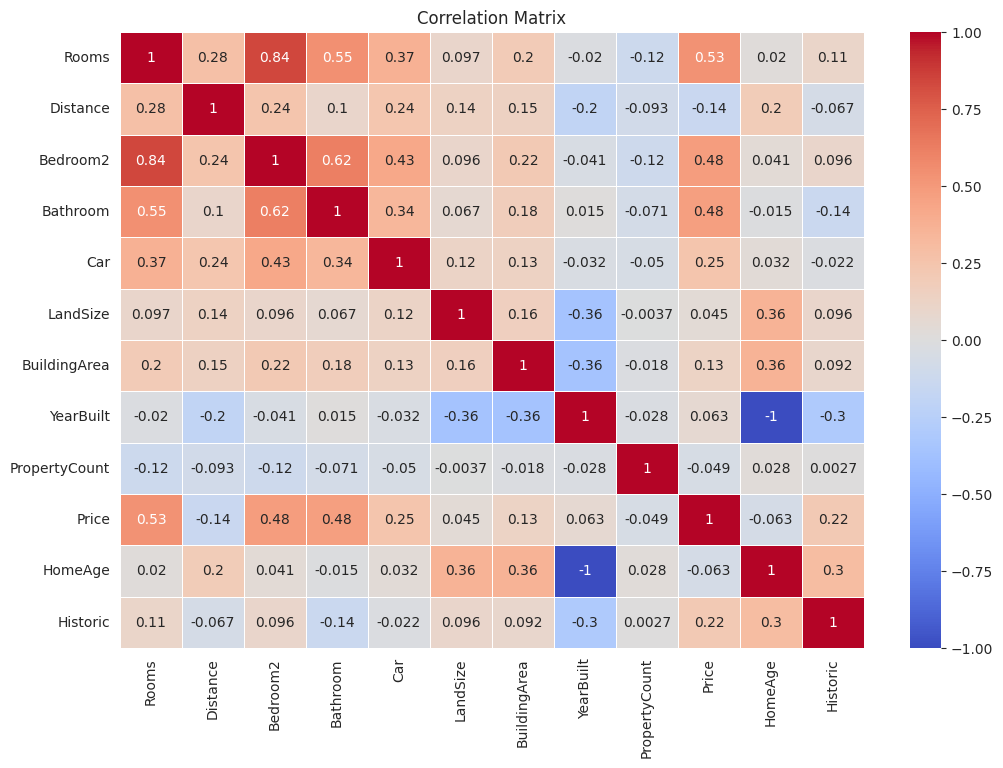

In [ ]:
#CORRELATION MAP
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()